![Memories Teach](https://lh3.google.com/u/2/d/11o4JyBYhHcmz-LSt63GpOs4lfW9j39T_=w1912-h954-iv1)


`Basic to Advance in Google colab's for image processing, pattern recognition and computer vision`

[Phonepaserth SISAYKEO]

Reference: visioncolab

# Face Clustering
(using AdaFace)

In [ ]:
!git clone https://github.com/mk-minchul/AdaFace
!mkdir /content/AdaFace/pretrained
!wget https://www.dropbox.com/scl/fi/5pvwapkas67jy9ypoarx3/adaface_ir50_ms1mv2.ckpt?rlkey=kgnqrjajlj2yt2c17dq8zn33r
!mv adaface_ir50_ms1mv2.ckpt?rlkey=kgnqrjajlj2yt2c17dq8zn33r /content/AdaFace/pretrained/adaface_ir50_ms1mv2.ckpt
!pip install pytorch-lightning

Cloning into 'AdaFace'...
remote: Enumerating objects: 233, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 233 (delta 56), reused 50 (delta 50), pack-reused 147
Receiving objects: 100% (233/233), 38.94 MiB | 35.16 MiB/s, done.
Resolving deltas: 100% (88/88), done.
--2023-10-18 16:01:31--  https://www.dropbox.com/scl/fi/5pvwapkas67jy9ypoarx3/adaface_ir50_ms1mv2.ckpt?rlkey=kgnqrjajlj2yt2c17dq8zn33r
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc606ef28c623fed91c2cf79397e.dl.dropboxusercontent.com/cd/0/inline/CF0wdQkEaURl7z_PzfQiehDjwa8InWwbANC-C9zI0tvDXq-4_PBAcRAeNcrr6TY5rC-ZBO3llAOz8gVCc0cVAIyHvwMc2by337_B6AUDU_zq5z8L57I51KMKMhG0VhbXnrA/file# [following]
--2023-10-18 16:01:32--  https://uc606ef28c623fed91c2cf79397e.dl.dropboxusercon

In [ ]:
import cv2
import torch
import torch.nn as nn
import numpy as np
from   PIL import Image
import matplotlib.pyplot as plt
import os, fnmatch
from   google.colab.patches import cv2_imshow
import seaborn as sn
#from   collections import namedtuple
from   tqdm.auto import tqdm

In [ ]:
%cd /content/AdaFace

/content/AdaFace


In [ ]:
from face_alignment import align
from inference import load_pretrained_model, to_input

model = load_pretrained_model('ir_50')

/content/AdaFace/face_alignment/mtcnn_pytorch/src/align_trans.py:287: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if align_type is 'cv2_affine':
/content/AdaFace/face_alignment/mtcnn_pytorch/src/align_trans.py:290: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif align_type is 'affine':


# Functions

In [ ]:

# List of files of a directory
def dirfiles(img_path,img_ext):
  # Example: img_names = dirfiles('/content/Test/','X*.jpg')
  img_names = fnmatch.filter(sorted(os.listdir(img_path)),img_ext)
  return img_names

def image2embedding(image_path):
  # Example: x = image2embedding('/content/Test/B000011.jpg')
  A         = cv2.imread(image_path)     # foto de galería
  img       = cv2.resize(A, (112,112))
  coverted  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  pil_image = Image.fromarray(coverted)
  bgr_input = to_input(pil_image)
  features, _ = model(bgr_input)
  X = features.detach()
  X = X.numpy()
  return X

# Embedding of a file list
def imagelist2adaface(img_path,img_names):
  # Example: img_names = dirfiles('/content/Test/','X*.jpg')
  #          X = imagelist2adaface('/content/Test/',img_names)
    n = len(img_names)
    embeddings = np.zeros((n,512))
    for i in tqdm(range(n)):
      embeddings[i,:] = image2embedding(img_path+img_names[i])
    return embeddings

# Labels (ground truth): m face images per subject
def face_labels(Z,m):
  n = Z.shape[0]
  y = np.zeros((n,),int)
  for i in range(n):
    y[i] = i/m
  return y

# Visualization of 2D feature space
def plot_features(X,d,st,show=1):
    dmin = int(np.min(d))
    dmax = int(np.max(d))
    if show==1:
      plt.figure(figsize=(12,8))
    for j in range(dmin,dmax+1):
        plt.scatter(X[d==j,0],X[d==j,1],label=str(j),s=27)
    plt.grid(True)
    plt.legend()
    plt.xlabel('$x_1$',fontsize=14)
    plt.ylabel('$x_2$',fontsize=14)
    plt.title('Feature Space - '+st,fontsize=14)
    if show==1:
        plt.show()




# ORL dataset

In [ ]:
!wget https://www.dropbox.com/s/w2y8uo7p0qgx6qr/ORL.zip
!unzip -qq ORL.zip

--2023-10-18 16:04:32--  https://www.dropbox.com/s/w2y8uo7p0qgx6qr/ORL.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/w2y8uo7p0qgx6qr/ORL.zip [following]
--2023-10-18 16:04:32--  https://www.dropbox.com/s/raw/w2y8uo7p0qgx6qr/ORL.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb8d0be0a2d6b2bd665e8ba39ce.dl.dropboxusercontent.com/cd/0/inline/CF1rPrVljDMmNn32b5Tthw3eRPh3KVurln-wyZJpAbUgeGYjFIdATUV2LRx_rKLjn95Dre4KYhBo95c4kHHPa3MDtU6Td3daSANXTGo_VqYOMw9I6q3OJmAuzu-4yhncOVs/file# [following]
--2023-10-18 16:04:32--  https://ucb8d0be0a2d6b2bd665e8ba39ce.dl.dropboxusercontent.com/cd/0/inline/CF1rPrVljDMmNn32b5Tthw3eRPh3KVurln-wyZJpAbUgeGYjFIdATUV2LRx_rKLjn95Dre4KYhBo95c4kHHPa3MDtU6Td3daSANXTGo_VqYOMw9I6q3OJmAuzu-4yhncOVs/file
R

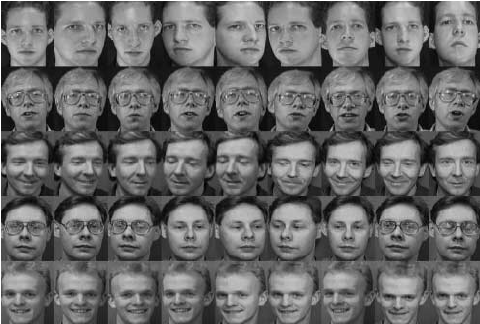

## Embedding extraction

In [ ]:
fpath = 'ORL/'
img_names = dirfiles(fpath,'face*.png')
X         = imagelist2adaface(fpath,img_names)

  0%|          | 0/400 [00:00<?, ?it/s]

/content/AdaFace/inference.py:25: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  tensor = torch.tensor([brg_img.transpose(2,0,1)]).float()


<Axes: >

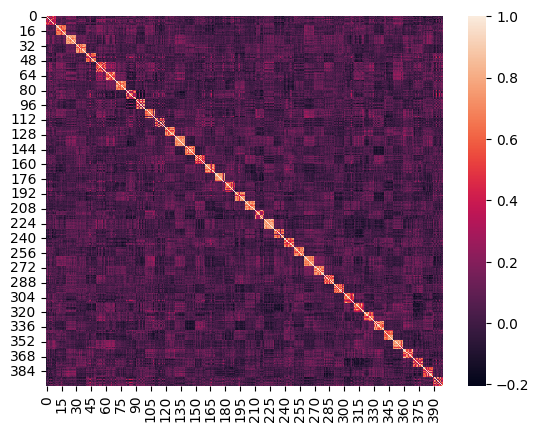

In [ ]:
Z = np.dot(X,X.T)
sn.heatmap(Z, annot=False)

In [ ]:
y = face_labels(Z,10) # ground truth

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=40)
model.fit(X)
yhat = model.predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


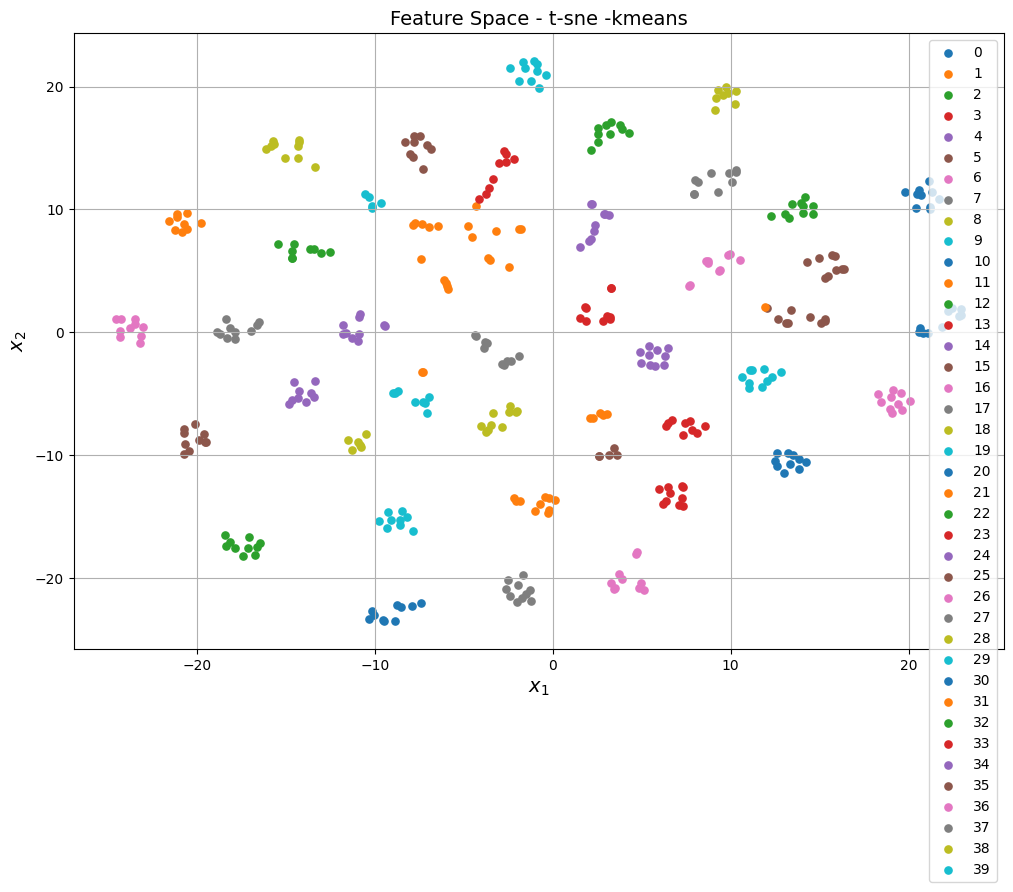

In [ ]:
from sklearn import manifold

model = manifold.TSNE(n_components=2, init='random',random_state=0)
Y = model.fit_transform(X)
plot_features(Y,yhat,'t-sne -kmeans')

# Show one cluster

In [ ]:
i=-1

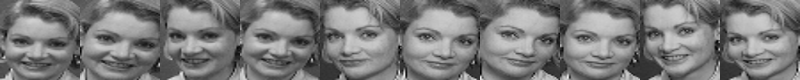

In [ ]:
i = i+1

ii = np.where(yhat==i)[0]

n = len(ii)

for k in range(n):
  j = ii[k]
  I = cv2.imread(fpath+img_names[j])
  J = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
  if k==0:
    II = J
  else:
    II = np.concatenate((II,J),axis=1)

cv2_imshow(II)

